# Load tissue images and manually count positive cells

by Pu Zheng

2023.11.24

In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())

1969770


In [2]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn
import ImageAnalysis3 as ia3
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast
from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

import pickle

In [3]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [6]:
meta_data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20231205-4T1F170-1128-6_T7_control'

condition_2_images = {}


for _fd in os.listdir(meta_data_folder):
    if os.path.isdir(os.path.join(meta_data_folder, _fd)) and 'Analysis' not in _fd:
        print(_fd)
        #_data_folder = os.path.join(meta_data_folder, _fd, 'H0M1')
        # scan subfolders
        folders, fovs = data_organization.search_fovs_in_folders(os.path.join(meta_data_folder, _fd))
        
        sel_fov_ids = np.arange(50,len(fovs), 100)
        
        condition_2_images[_fd] = []
        for _fov_id in sel_fov_ids:
            image_filename = os.path.join(folders[0], fovs[_fov_id]) #select fov here
            print(image_filename)
            # load image
            daxp = dax_process.DaxProcesser(image_filename,
                                CorrectionFolder=r'/lab/weissman_imaging/puzheng/Corrections/20231012-Merscope01_s40_n500', # Merscope01
                               )
            daxp._load_image()
            daxp._corr_illumination()
            # append
            condition_2_images[_fd].append(np.array([daxp.im_748, daxp.im_637, daxp.im_405]))
    

No_T7
- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20231205-4T1F170-1128-6_T7_control/No_T7
-- 1 folders, 415 fovs detected.
/lab/weissman_imaging/puzheng/PE_LT/20231205-4T1F170-1128-6_T7_control/No_T7/H0M1/Conv_zscan_050.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231205-4T1F170-1128-6_T7_control/No_T7/H0M1/Conv_zscan_050.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231205-4T1F170-1128-6_T7_control/No_T7/H0M1/Conv_zscan_050_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 8.973s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Start illumination correction for channels:['748', '637', '545', '477', '405'].
-- loading illumination correction profile from file:
	 748 illumination_correction_748_2304

-- corrected illumination for channel 637 in 3.883s.
-- corrected illumination for channel 545 in 4.256s.
-- corrected illumination for channel 477 in 4.355s.
-- corrected illumination for channel 405 in 4.954s.
- Finished illumination correction in 21.509s.
/lab/weissman_imaging/puzheng/PE_LT/20231205-4T1F170-1128-6_T7_control/T7/H0M1/Conv_zscan_250.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20231205-4T1F170-1128-6_T7_control/T7/H0M1/Conv_zscan_250.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20231205-4T1F170-1128-6_T7_control/T7/H0M1/Conv_zscan_250_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 9.949s.
- Correct illumination for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_illumination.
- Start illumination correction for channels:['748', '637', '54

In [7]:
condition_2_images.keys()

dict_keys(['No_T7', 'T7'])

<IPython.core.display.Javascript object>


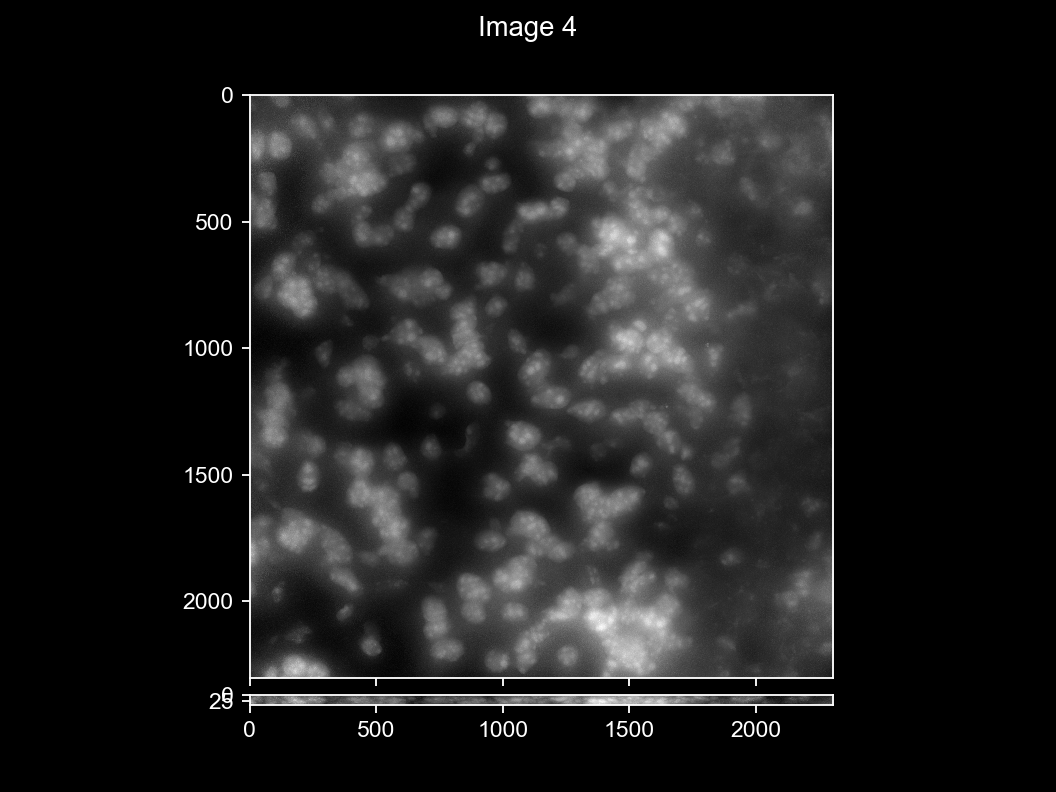

In [10]:
%matplotlib notebook
fig = plt.figure(dpi=150)
interactive.imshow_mark_3d([_ims[-1] for _ims in condition_2_images['No_T7']], fig=fig, min_max_default=[1000,5000])

In [11]:
import matplotlib.pyplot as plt
def _rescaling(im, vmin=None, vmax=None):
    if vmin is None:
        vmin = np.min(im)
    if vmax is None:
        vmax = np.max(im)
    _res_im = np.clip(im, vmin, vmax)
    _res_im = (_res_im - vmin) / (vmax - vmin)
    _res_im = (_res_im * np.iinfo(np.uint8).max ).astype(np.uint8)
    return _res_im
def rescale_by_percentile(im, min_max_percent=[30,99.9]):
    from scipy.stats import scoreatpercentile
    vmin, vmax = scoreatpercentile(im, min(min_max_percent)), scoreatpercentile(im, max(min_max_percent))
    return _rescaling(im, vmin=vmin, vmax=vmax)

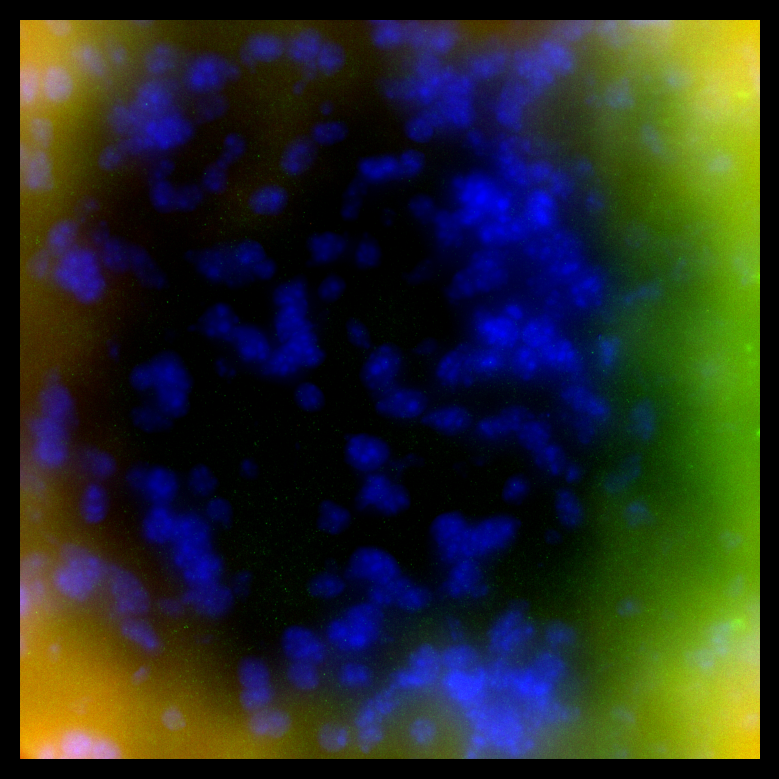

In [20]:
_ims = condition_2_images['No_T7'][3]

sel_im_proj = np.array([rescale_by_percentile(_img.max(0)) 
                        for _img in _ims]).transpose(1,2,0)
%matplotlib inline
plt.figure(dpi=200)
plt.imshow(sel_im_proj)
plt.axis('off')
plt.show()

In [21]:
_ims = condition_2_images['T7'][4]

sel_im_proj = np.array([rescale_by_percentile(_img.max(0)) 
                        for _img in _ims]).transpose(1,2,0)
%matplotlib inline
plt.figure(dpi=200)
plt.imshow(sel_im_proj)
plt.axis('off')
plt.show()

IndexError: list index out of range

In [57]:
len('          ')

10

In [81]:
counts2

array([173, 271])

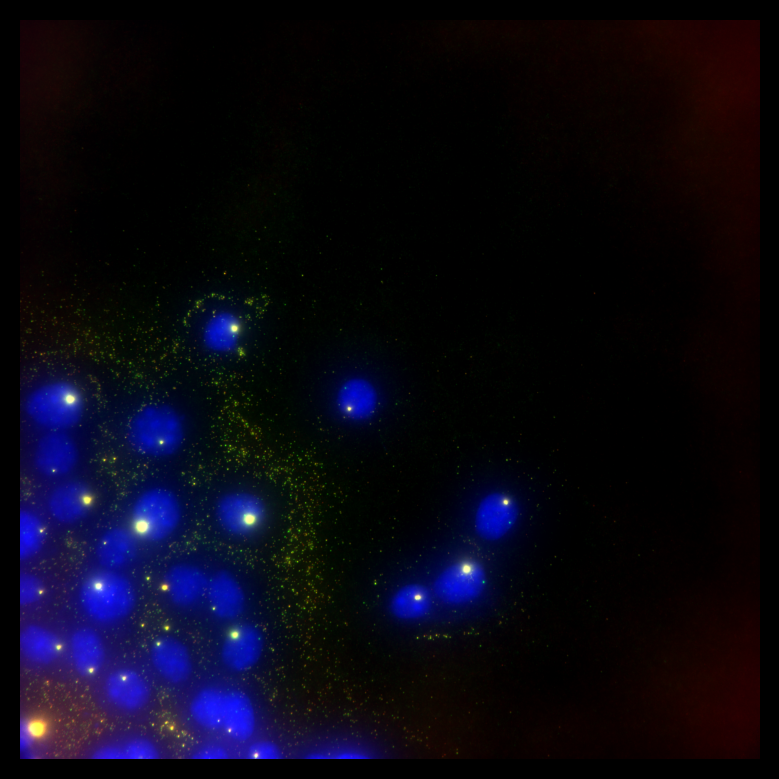

In [81]:
_ims = condition_2_images['1-20'][9]

sel_im_proj = np.array([rescale_by_percentile(_img.max(0)) 
                        for _img in _ims]).transpose(1,2,0)

plt.figure(dpi=200)
plt.imshow(sel_im_proj)
plt.axis('off')
plt.show()

In [77]:
len('                                             ')

45